# Machine Learning 2022-2023 - UMONS

# Regularization

In this lab, we'll experiment with two regularization methods, Ridge and Lasso. In the regression setting, given a training dataset $\mathcal{D} = \{(x_i,y_i)\}_{i=1}^n$, recall from the course that Ridge regression aims to find the coefficients $\beta_R$ that mimimize the following optimization problem:

$$\beta_R = \underset{\beta}{\text{argmin}} \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\right)^2 + \lambda \sum_{j=1}^p \beta_j^2$$

where $\lambda$ is a hyper-parameter controling the amount of shrinkage applied to the coefficients $\beta_j$. On the other hand, the Lasso regression coefficients are obtained from the following optimization problem :

$$ \beta_L = \underset{\beta}{\text{argmin}} \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\right)^2 + \lambda \sum_{j=1}^p |\beta_j|$$ 

In the binary classification setting, where $\mathcal{Y} = \{0,1\}$, ridge logistic regression aims instead to solve the following optimization problem:

$$\beta_R = \underset{\beta}{\text{argmin}}\left[-\text{log}~\mathcal{L(\boldsymbol{\beta};\mathcal{D})} + \lambda \sum_{j=1}^p \beta_j^2\right],$$

where $-\text{log}~\mathcal{L(\boldsymbol{\beta};\mathcal{D})}$ is the negative conditional log-likelihood, i.e.

$$-\text{log}~\mathcal{L(\boldsymbol{\beta};\mathcal{D})} = -\frac{1}{n} \sum_{i=1}^n y_i\text{log}~p(y_i=1|\boldsymbol{x}_i; \boldsymbol{\beta}) + (1-y_i)\text{log}~p(y_i=0|\boldsymbol{x}_i;\boldsymbol{\beta}),$$

with ${p(y_i=1|\boldsymbol{x}_i;\boldsymbol{\beta}) = \frac{e^{\boldsymbol{\beta}^\intercal \boldsymbol{x}_i}}{1 + e^{\boldsymbol{\beta}^\intercal \boldsymbol{x}_i}}}$ being a logistic regression classifier where $\boldsymbol{\beta}, \boldsymbol{x}_i \in \mathbb{R}^p$. Alternatively, Lasso logistic regression aims to minimize the following objective:

$$\beta_L = \underset{\beta}{\text{argmin}}\left[-\text{log}~\mathcal{L(\boldsymbol{\beta};\mathcal{D})} + \lambda \sum_{j=1}^p |\beta_j|\right]$$

The purpose of the lab is to better understand the influence of $\lambda$ on the fitted models, in both the regression and classification settings.

**Import the necessary libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    confusion_matrix,
    mean_squared_error,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

### Regularization in regression

**Use the code snippet below to generate some data points**

In [2]:
X, y, coef = datasets.make_regression(
    n_samples=100,  # number of samples
    n_features=5,  # number of features
    n_informative=5,  # number of useful features
    noise=10,  # standard deviation of the gaussian noise
    coef=True,  # true coefficient used to generated the data
    random_state=0,  # always create the same dataset
)

**1) Fit a ridge regression to the data for $\lambda$ varying between 1 and 2000 by steps of 1, and plot the evolution of the coefficients as a function of $\lambda$. What do you observe ? Redo the same operation for Lasso regression with $\lambda$ varying between 1 and 100.**

You will need to use the methods Ridge() and Lasso() from the scikit-learn library.

**2) Reuse the code snippet above to generate 100 samples with 90 features, with only 2 being informative on the response $y$. Split your dataset on a train and a test split using a 80/20 partition. For increasing values of $\lambda$ between 0.1 and 10 (by steps of 0.1), fit a ridge regression model on the training data and plot its MSE as a function of $\lambda$. What do you observe ? Do the same for a Lasso regression.** 

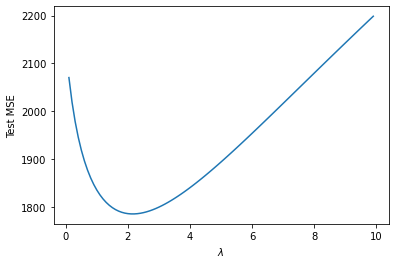

In [5]:
X, y, coef = datasets.make_regression(
    n_samples=100,  # number of samples
    n_features=90,  # number of features
    n_informative=2,  # number of useful features
    noise=10,  # bias and standard deviation of the guassian noise
    coef=True,  # true coefficient used to generated the data
    random_state=0,  # always create the same dataset
)

**3) Use the code snippet below to simulate some data. Then, perform the following steps:**
- **Split your dataset into training and test sets following a 80/20 partition.**
- **For values of $\lambda$ in [0,10], perform a GridSearch cross-validation with CV=10 to identify the best value of $\lambda$ for both the Ridge and Lasso regression.**
    - **You'll need the GridSearchCV() method of scikit-learn for this step. Use the mean squared error as selection metric.**
    - **What is the best values $\lambda_R$ and $\lambda_L$ for Ridge and Lasso respectively?**
- **Using these best values of $\lambda_R$ and $\lambda_L$, refit the models to the full training set.**
- **Evaluate the training and test MSE using the fitted models, and compare it to the training and test MSE of a linear regression model fitted on all predictors.**
- **How many coefficients are non-zero for the Lasso regression?**

In [7]:
X, y, coef = datasets.make_regression(
    n_samples=500,  # number of samples
    n_features=350,  # number of features
    n_informative=2,  # number of useful features
    noise=5,  # bias and standard deviation of the guassian noise
    coef=True,  # true coefficient used to generated the data
    random_state=1,  # always create the same dataset
)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error')

### Regularization in classification

**Use the code snippet below to generate a classification dataset.**

In [11]:
X, y = datasets.make_classification(
    n_samples=200,  # number of samples
    n_features=30,  # number of features
    n_informative=5,  # number of useful features
    random_state=0,
    weights=[0.8, 0.2],  # Proportion of samples per class.
)

**4) Using the data generated dataset above, apply the following steps:**
- **Split your dataset into training and test sets following a 80/20 partition.**
- **For values of $\lambda$ in [0,10], perform a GridSearch cross-validation with CV=10 to identify the best value of $\lambda$ for both the Ridge and Lasso logistic regression classifiers.**
    - **Check the arguments 'penalty' and 'C' of the LogisticRegression() method to define Ridge and Lasso classifiers. Select 'saga' as solver for Ridge and 'liblinear' as solver for Lasso.**
    - **You'll need the GridSearchCV() method of scikit-learn for this step. Use the accuracy as selection metric.**
    - **What is the best values $\lambda_R$ and $\lambda_L$ for Ridge and Lasso respectively?**
- **Using these best values of $\lambda_R$ and $\lambda_L$, refit the models to the full training set.**
- **Evaluate the training and test accuracy using the fitted models, and compare it to the training and test accuracy of a logistic regression model fitted on all predictors.**
    - **Use the 'saga' solver for the logistic regression model.**

**5) For the Logistic regression, Ridge logistic regression and Lasso logistic regression, do:** 
- **Plot the confusion matrix of the test predictions. You'll the need the 'confusion_matrix()' and 'ConfusionMatrixDisplay() methods.**
- **Compute the True Positive Rate, False Positive Rate, True Negative Rate, False Negative Rate, and Precision of the models on the test set.**
    - **You can access the necessary quantities out of the confusion matrix.**

**6) For the Logistic regression, Ridge logistic regression and Lasso logistic regression, do:**
- **Plot the ROC curve of the test predictions, and show the AUROC (Area Under the ROC curve) on the same figure.**
    - **Check the methods 'roc_curve()' and 'roc_auc_score()'.**